In [4]:
import matplotlib.pyplot as plt  # plt用于显示图片
import matplotlib.image as mpimg  # mpimg用于读取图片
import numpy as np
import tensorflow as tf

## 1.载入图片并显示

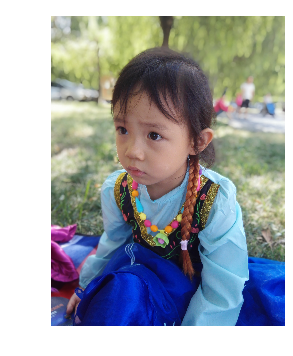

(3264, 2448, 3)


In [7]:
myimg = mpimg.imread("img/img.jpg")  # 读取图片
plt.imshow(myimg)     # 显示图片
plt.axis('off')       # 不显示坐标轴
plt.show()
print(myimg.shape)

## 2.定义占位符、卷积核、卷积op

In [14]:
full = np.reshape(myimg, [1, 3264, 2448, 3])
# tf.contant函数可以将常数直接初始化到Variable中，因为是3通道，所哟sobel卷积核的每个元素被扩成了3个
inputfull = tf.Variable(tf.constant(1.0, shape=[1, 3264, 2448, 3]))

filter = tf.Variable(tf.constant([[-1.0, -1.0, -1.0], [0, 0, 0], [1.0, 1.0, 1.0],
                                [-2.0, -2.0, -2.0], [0, 0, 0], [2.0, 2.0, 2.0],
                                [-1.0, -1.0, -1.0], [0, 0, 0], [1.0, 1.0, 1.0]],
                                shape = [3, 3, 3, 1]))
# 卷积op的步长1*1， padding为SAME表明是同卷积的操作
op = tf.nn.conv2d(inputfull, filter, strides=[1, 1, 1, 1], padding='SAME')
# 归一化, sobel不能保证每个像素在0-255中间，所以要做一个归一化
# 每个值减去最小值的结果，再除以最大值与最小值的差值
o = tf.cast( ((op-tf.reduce_min(op)) / (tf.reduce_max(op) - tf.reduce_min(op))) * 255, tf.uint8 )

## 3.运行卷积操作并显示

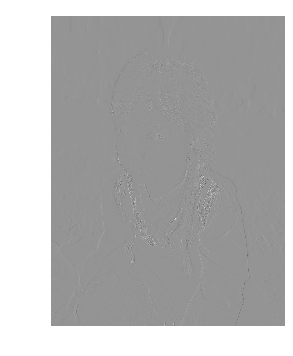

In [22]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    t,f = sess.run([o, filter], feed_dict = {inputfull:full})
    t = np.reshape(t, [3264, 2448])
    plt.imshow(t, cmap='Greys_r')   # 显示图片
    plt.axis('off')                 # 不显示坐标轴
    plt.show()